# Muon Experiment
The muon experience could be divided into two main parts. The first one has to do with the $\beta$ measurement of muons. The second one is the angle dependance of the muon's flux.

# Time of Flight
This is the first part. The main steps to do are:
1) compute the "timing" due to the cables using SHORT and FLIP measures
2) measure the $\beta$

## ToF calibration

In [2]:
//importo i dati e li carico nei tree. Devo fare così perchè sono stati tutti salvati con il nome tree
//SHORT
TFile* file0_SHORT = new TFile("./DATA/SHORT/wave_0_reco.root");
TTree* pad_0_SHORT = (TTree*)file0_SHORT->Get("tree");
TFile* file1_SHORT = new TFile("./DATA/SHORT/wave_1_reco.root");
TTree* pad_1_SHORT = (TTree*)file1_SHORT->Get("tree");
TFile* file2_SHORT = new TFile("./DATA/SHORT/wave_2_reco.root");
TTree* pad_2_SHORT = (TTree*)file2_SHORT->Get("tree");
TFile* file3_SHORT = new TFile("./DATA/SHORT/wave_3_reco.root");
TTree* pad_3_SHORT = (TTree*)file3_SHORT->Get("tree");

//FLIP
TFile* file0_FLIP = new TFile("./DATA/FLIP/wave_0_reco.root");
TTree* pad_0_FLIP = (TTree*)file0_FLIP->Get("tree");
TFile* file1_FLIP = new TFile("./DATA/FLIP/wave_1_reco.root");
TTree* pad_1_FLIP = (TTree*)file1_FLIP->Get("tree");
TFile* file2_FLIP = new TFile("./DATA/FLIP/wave_2_reco.root");
TTree* pad_2_FLIP = (TTree*)file2_FLIP->Get("tree");
TFile* file3_FLIP = new TFile("./DATA/FLIP/wave_3_reco.root");
TTree* pad_3_FLIP = (TTree*)file3_FLIP->Get("tree");

**SHORT UP**

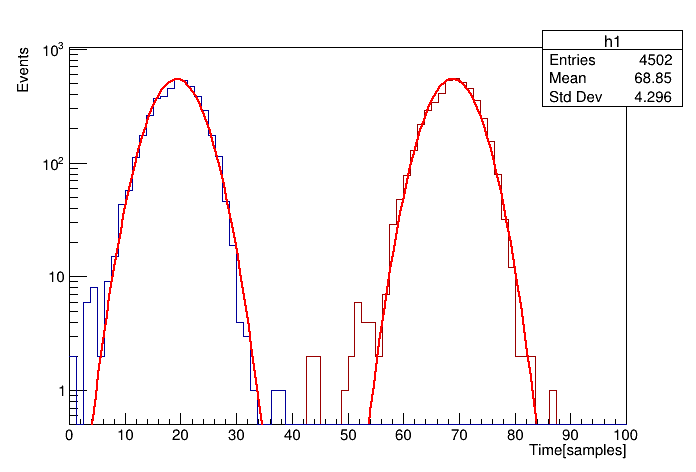

 FCN=93.0341 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=5.78422e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.45119e+02   9.90444e+00   3.88720e-02   8.69211e-07
   2  Mean         6.88924e+01   6.43462e-02   2.87865e-04  -5.01136e-04
   3  Sigma        4.03376e+00   4.10459e-02   1.23373e-05   2.32009e-03
 FCN=81.4573 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=1.31027e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.40637e+02   9.82442e+00   3.60632e-02  -4.56559e-05
   2  Mean         1.93409e+01   6.42083e-02   2.72270e-04  -5.72820e-03
   3  Sigma        4.07639e+00   

In [3]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";Time[samples];Events",80,0,100);
TH1D* h2 = new TH1D("h2",";Time[samples];Events",80,0,100);
pad_0_SHORT->Draw("Time>>h1","");
pad_1_SHORT->Draw("Time>>h2","","same");
h1->SetLineColor(kRed+2);

TF1* f1 = new TF1("f1","gaus(0)",0,100);
f1->SetParameter(0,40);
f1->SetParameter(1,70); //centro gaussiana
f1->SetParameter(2,20); //sigma gaussiana
h1->Fit("f1","", " ", 40, 100); //L:likelyhood 

TF1* f2 = new TF1("f2","gaus(0)",0,100);
f2->SetParameter(0,40);
f2->SetParameter(1,30); //centro gaussiana
f2->SetParameter(2,20); //sigma gaussiana
h2->Fit("f2","", " ", 0, 50); //L:likelyhood 

double T0_mean_SHORT = f1->GetParameter(1); //centro gaussiana
double T0_err_SHORT = f1->GetParError(1); //suo errore

double T1_mean_SHORT = f2->GetParameter(1); //centro gaussiana
double T1_err_SHORT = f2->GetParError(1); //suo errore


gPad->SetLogy();
c2->Draw();

**FLIP**

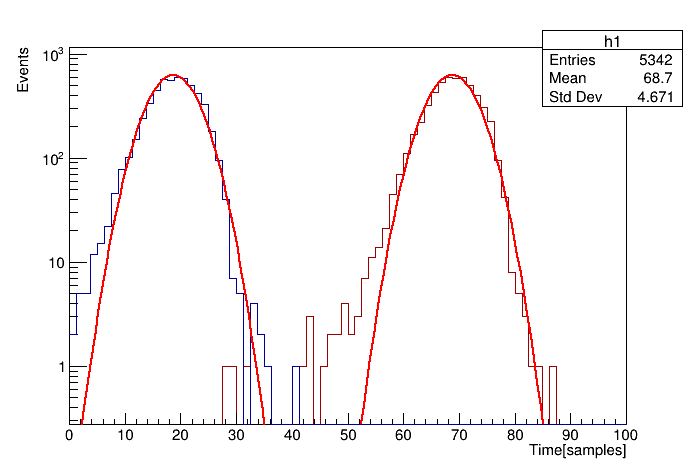

 FCN=160.28 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=1.36882e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.21601e+02   1.06665e+01   5.35639e-02  -7.55690e-06
   2  Mean         6.87924e+01   6.33680e-02   3.58196e-04   6.82493e-03
   3  Sigma        4.15476e+00   4.18409e-02   1.49992e-05  -6.51499e-02
 FCN=151.102 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.13596e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.22144e+02   1.06966e+01   5.20466e-02  -4.64249e-05
   2  Mean         1.87126e+01   6.25390e-02   3.49073e-04   3.89180e-03
   3  Sigma        4.15690e+00   4

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [4]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";Time[samples];Events",80,0,100);
TH1D* h2 = new TH1D("h2",";Time[samples];Events",80,0,100);
pad_0_FLIP->Draw("Time>>h1","");
pad_1_FLIP->Draw("Time>>h2","","same");
h1->SetLineColor(kRed+2);

TF1* f1 = new TF1("f1","gaus(0)",0,100);
f1->SetParameter(0,40);
f1->SetParameter(1,70); //centro gaussiana
f1->SetParameter(2,20); //sigma gaussiana
h1->Fit("f1","", " ", 40, 100); //L:likelyhood 

TF1* f2 = new TF1("f2","gaus(0)",0,100);
f2->SetParameter(0,40);
f2->SetParameter(1,30); //centro gaussiana
f2->SetParameter(2,20); //sigma gaussiana
h2->Fit("f2","", " ", 0, 50); //L:likelyhood 

double T0_mean_FLIP = f1->GetParameter(1); //centro gaussiana
double T0_err_FLIP = f1->GetParError(1); //suo errore

double T1_mean_FLIP = f2->GetParameter(1); //centro gaussiana
double T1_err_FLIP = f2->GetParError(1); //suo errore

gPad->SetLogy();
c2->Draw();

In [34]:
double corr1=(T0_mean_SHORT-T1_mean_SHORT+T0_mean_FLIP-T1_mean_FLIP)/2

(double) 49.815664


so that TF1+corr1 is offset free

## $\beta$ measurement

In [19]:
//importo i dati e li carico nei tree. Devo fare così perchè sono stati tutti salvati con il nome tree
TFile* file0 = new TFile("./DATA/LONG/wave_0_reco.root");
TTree* pad_0 = (TTree*)file0->Get("tree");
TFile* file1 = new TFile("./DATA/LONG/wave_1_reco.root");
TTree* pad_1 = (TTree*)file1->Get("tree");
TFile* file2 = new TFile("./DATA/LONG/wave_2_reco.root");
TTree* pad_2 = (TTree*)file2->Get("tree");
TFile* file3 = new TFile("./DATA/LONG/wave_3_reco.root");
TTree* pad_3 = (TTree*)file3->Get("tree");

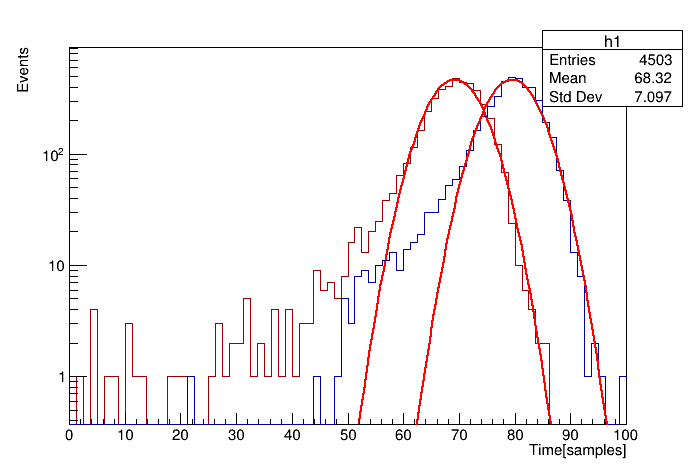

 FCN=213.959 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=6.50403e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.64661e+02   9.11690e+00   5.10646e-02   1.84391e-05
   2  Mean         6.92676e+01   7.66846e-02   5.00925e-04  -7.81173e-04
   3  Sigma        4.55516e+00   5.57180e-02   1.92491e-05  -6.89686e-02
 FCN=289.632 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=4.32151e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.63797e+02   9.10784e+00   5.97043e-02  -3.87087e-05
   2  Mean         7.95369e+01   7.86485e-02   5.79209e-04   1.07461e-03
   3  Sigma        4.49622e+00   

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)


In [38]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";Time[samples];Events",80,0,100);
TH1D* h2 = new TH1D("h2",";Time[samples];Events",80,0,100);
pad_0->Draw("Time>>h1","");
pad_1->Draw("Time+49.815664>>h2","","same");
h1->SetLineColor(kRed+2);

TF1* f1 = new TF1("f1","gaus(0)",0,100);
f1->SetParameter(0,40);
f1->SetParameter(1,70); //centro gaussiana
f1->SetParameter(2,20); //sigma gaussiana
h1->Fit("f1","", " ", 40, 100); //L:likelyhood 

TF1* f2 = new TF1("f2","gaus(0)",0,100);
f2->SetParameter(0,40);
f2->SetParameter(1,80); //centro gaussiana
f2->SetParameter(2,20); //sigma gaussiana
h2->Fit("f2","", " ", 50, 100); //L:likelyhood 

double p1 = f1->GetParameter(2); //centro gaussiana
double ep1 = f1->GetParError(2); //suo errore
double s1 = f1->GetParameter(3); //sigma gaussiana
double es1 = f1->GetParError(3);  //suo errore

gPad->SetLogy();
c2->Draw();